In [27]:
import pandas as pd

Данные Netflix были взяты из датасета на Kaggle

In [28]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1npgstymQl8a7EHwAvbsn8x7G22jMG2PSRRrfD56LOEg/export?format=csv&gid=1905857806')

In [29]:
len(df)

65

In [30]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


Данные среднего дохода (PPP) взяты из википедии.

In [31]:
df_ppp = pd.read_csv('https://docs.google.com/spreadsheets/d/13CkLyr64lBgmwJRpOrlBCvaFj_kllCbJ6LoJ5qMru_s/export?format=csv&gid=681675911')

In [32]:
df_ppp.head()

,Country,Subregion,Region,Estimate,Year
0,Liechtenstein *,Western Europe,Europe,NaN,NaN
1,Luxembourg *,Western Europe,Europe,"122,74",2021.0
2,Monaco *,Western Europe,Europe,NaN,NaN
3,Singapore *,South-eastern Asia,Asia,"102,742",2021.0
4,Ireland *,Northern Europe,Europe,"99,239",2021.0


In [33]:
df_ppp['Country'] = df_ppp['Country'].apply(lambda x: x[:-2])

In [34]:
df_with_PPP = df.merge(df_ppp, left_on='Country', right_on='Country', how='outer')

In [35]:
df_with_PPP.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Subregion,Region,Estimate,Year
0,ar,Argentina,4760.0,3154.0,1606.0,3.74,6.30,9.26,South America,Americas,"22,141",2021.0
1,au,Australia,6114.0,4050.0,2064.0,7.84,12.12,16.39,"Australia, New Zealand",Oceania,"54,891",2021.0
2,at,Austria,5640.0,3779.0,1861.0,9.03,14.67,20.32,Western Europe,Europe,"57,891",2021.0
3,be,Belgium,4990.0,3374.0,1616.0,10.16,15.24,20.32,Western Europe,Europe,"53,973",2021.0
4,bo,Bolivia,4991.0,3155.0,1836.0,7.99,10.99,13.99,South America,Americas,"8,832",2021.0


In [36]:
df_with_PPP = df_with_PPP.dropna(subset=['Estimate', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'])

Построим график корреляции между средним доходом (PPP) и ценой подписки

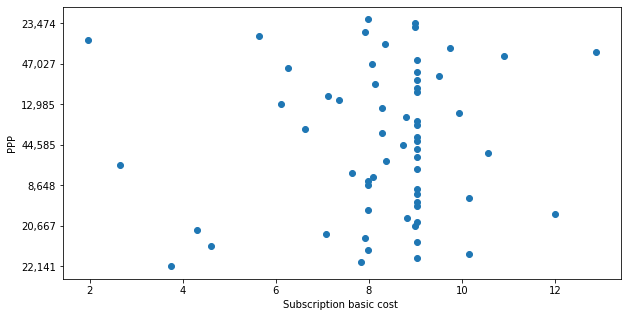

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df_with_PPP['Cost Per Month - Basic ($)'], y = df_with_PPP['Estimate'])
plt.xlabel("Subscription basic cost ")
plt.ylabel("PPP")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

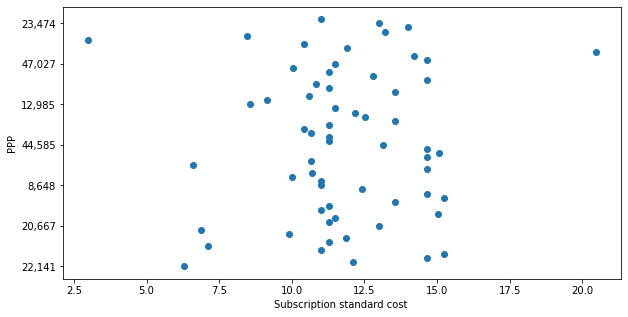

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df_with_PPP['Cost Per Month - Standard ($)'], y = df_with_PPP['Estimate'])
plt.xlabel("Subscription standard cost ")
plt.ylabel("PPP")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

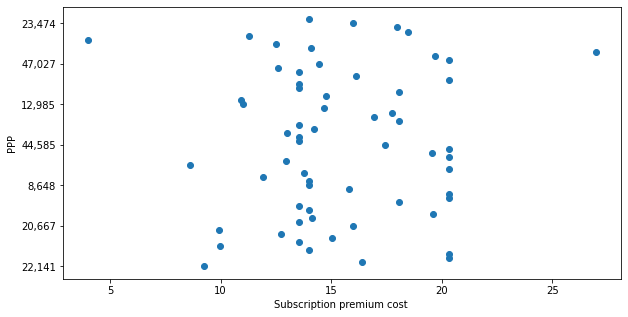

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df_with_PPP['Cost Per Month - Premium ($)'], y = df_with_PPP['Estimate'])
plt.xlabel("Subscription premium cost ")
plt.ylabel("PPP")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

Ответим на вопросы:

    1) Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 
    2) Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента
    3) Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?
    4) Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
    5) Какой процент среднего дохода россиянина будет составлять подписка Netflix?
    6) На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)
    7) В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?


**1) Cредняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.** 

In [40]:
df_cur = pd.read_csv('https://docs.google.com/spreadsheets/d/131wpJ9VlR7J-Raxw3gqD_9__S_2S0oQZwnBOLjEz0xY/export?format=csv&gid=0')

In [41]:
df_cur.head()

,State,Currency,Symbol,ISO
0,Abkhazia,Abkhazian apsar[E],(none),(none)
1,Afghanistan,Afghan afghani,؋,AFN
2,Akrotiri and Dhekelia,Euro,€,EUR
3,Albania,Albanian lek,L,ALL
4,Alderney,British pound[F][E],£,GBP


In [42]:
df_with_ISO = df.merge(df_cur, left_on='Country', right_on='State', how='outer')
df_with_ISO = df_with_ISO.dropna(subset=['ISO', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'])

In [43]:
df_with_ISO.groupby('ISO')['Cost Per Month - Basic ($)'].mean()

ISO
ARS     3.74000
AUD     7.84000
BGN     9.03000
BOB     7.99000
BRL     4.61000
CAD     7.91000
CHF    12.88000
CLP     7.07000
COP     4.31000
CRC     8.99000
DKK    12.00000
EUR     9.17125
GBP     7.91000
GIP     9.03000
GTQ     7.99000
HKD     8.08000
HNL     7.99000
HRK     9.03000
HUF     7.64000
IDR     8.36000
ILS    10.56000
INR     2.64000
ISK     9.03000
JPY     8.73000
MDL     9.03000
MXN     6.62000
MYR     8.29000
NOK     9.94000
NZD     8.80000
PEN     6.11000
PHP     7.35000
PLN     7.13000
PYG     8.29000
RON     9.03000
RUB     8.13000
SEK    10.90000
SGD     9.51000
THB     8.34000
TRY     1.97000
TWD     9.74000
UAH     5.64000
USD     8.49000
UYU     8.99000
VES     7.99000
ZAR     6.26000
Name: Cost Per Month - Basic ($), dtype: float64

In [44]:
df_with_ISO.groupby('ISO')['Cost Per Month - Standard ($)'].mean()

ISO
ARS     6.30000
AUD    12.12000
BGN    11.29000
BOB    10.99000
BRL     7.11000
CAD    11.87000
CHF    20.46000
CLP     9.91000
COP     6.86000
CRC    12.99000
DKK    15.04000
EUR    13.54375
GBP    13.20000
GIP    14.67000
GTQ    10.99000
HKD    10.00000
HNL    10.99000
HRK    11.29000
HUF    10.71000
IDR    10.66000
ILS    15.05000
INR     6.61000
ISK    14.67000
JPY    13.13000
MDL    11.29000
MXN    10.43000
MYR    10.65000
NOK    12.17000
NZD    12.53000
PEN     8.56000
PHP     9.14000
PLN    10.58000
PYG    11.49000
RON    11.29000
RUB    10.84000
SEK    14.20000
SGD    12.81000
THB    10.43000
TRY     3.00000
TWD    11.90000
UAH     8.46000
USD    12.49000
UYU    12.99000
VES    10.99000
ZAR    10.05000
Name: Cost Per Month - Standard ($), dtype: float64

In [45]:
df_with_ISO.groupby('ISO')['Cost Per Month - Premium ($)'].mean()

ISO
ARS     9.26000
AUD    16.39000
BGN    13.54000
BOB    13.99000
BRL     9.96000
CAD    15.03000
CHF    26.96000
CLP    12.74000
COP     9.93000
CRC    15.99000
DKK    19.60000
EUR    17.91875
GBP    18.48000
GIP    20.32000
GTQ    13.99000
HKD    11.93000
HNL    13.99000
HRK    13.54000
HUF    13.78000
IDR    12.96000
ILS    19.54000
INR     8.60000
ISK    20.32000
JPY    17.45000
MDL    13.54000
MXN    14.24000
MYR    13.02000
NOK    17.75000
NZD    16.94000
PEN    11.01000
PHP    10.93000
PLN    14.76000
PYG    14.69000
RON    13.54000
RUB    13.56000
SEK    19.70000
SGD    16.11000
THB    12.52000
TRY     4.02000
TWD    14.07000
UAH    11.29000
USD    15.99000
UYU    15.99000
VES    13.99000
ZAR    12.58000
Name: Cost Per Month - Premium ($), dtype: float64

**2) Cредняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента** 

In [46]:
df_with_PPP.groupby('Region')['Cost Per Month - Basic ($)'].mean()

Region
Africa      6.260000
Americas    7.223750
Asia        7.636667
Europe      9.125484
Oceania     8.320000
Name: Cost Per Month - Basic ($), dtype: float64

In [47]:
df_with_PPP.groupby('Region')['Cost Per Month - Standard ($)'].mean()


Region
Africa      10.050000
Americas    10.465625
Asia        10.404167
Europe      13.021935
Oceania     12.325000
Name: Cost Per Month - Standard ($), dtype: float64

In [48]:
df_with_PPP.groupby('Region')['Cost Per Month - Premium ($)'].mean()


Region
Africa      12.580000
Americas    13.548750
Asia        12.966667
Europe      17.135806
Oceania     16.665000
Name: Cost Per Month - Premium ($), dtype: float64

**3) Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии** 

---



In [51]:
df_czechia = df_with_PPP.loc[df_with_PPP['Country'] == 'Czechia']

In [52]:
df_czechia

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Subregion,Region,Estimate,Year
12,cz,Czechia,7325.0,5234.0,2091.0,8.83,11.49,14.15,Eastern Europe,Europe,"42,956",2021.0


In [71]:
print(f"Базовая: {df_czechia['Cost Per Month - Basic ($)'].values[0]/float(df_czechia['Estimate'].values[0].replace(',','.'))}")

Базовая: 0.20555917683210725


In [73]:
print(f"Стандартная: {df_czechia['Cost Per Month - Standard ($)'].values[0]/float(df_czechia['Estimate'].values[0].replace(',','.'))}")

Стандартная: 0.267483005866468


In [72]:
print(f"Премиум: {df_czechia['Cost Per Month - Premium ($)'].values[0]/float(df_czechia['Estimate'].values[0].replace(',','.'))}")

Премиум: 0.3294068349008287


**4) Какие топ-5 стран имеют самую большую доступную коллекцию сериалов** 

In [96]:
df.nlargest(5, 'No. of TV Shows')[['Country', 'No. of TV Shows']]

,Country,No. of TV Shows
12,Czechia,5234
51,Slovakia,5055
6,Bulgaria,4819
24,Hungary,4802
61,United Kingdom,4551


**5) Какой процент среднего дохода россиянина будет составлять подписка Netflix** 

In [97]:
df_russia = df_with_PPP.loc[df_with_PPP['Country'] == 'Russia']

In [103]:
print(f"Базовая: {round(df_russia['Cost Per Month - Basic ($)'].values[0]/float(df_czechia['Estimate'].values[0].replace(',','.')) * 100, 2)}%")

Базовая: 18.93%


In [104]:
print(f"Стандартная: {round(df_russia['Cost Per Month - Standard ($)'].values[0]/float(df_czechia['Estimate'].values[0].replace(',','.')) * 100, 2)}%")

Стандартная: 25.24%


In [105]:
print(f"Премиум: {round(df_russia['Cost Per Month - Premium ($)'].values[0]/float(df_czechia['Estimate'].values[0].replace(',','.')) * 100, 2)}%")

Премиум: 31.57%


**6) На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)** 

In [112]:
df['Basic Cost Per Title'] = df['Cost Per Month - Basic ($)'] / df['Total Library Size']
df['Standard Cost Per Title'] = df['Cost Per Month - Standard ($)'] / df['Total Library Size']
df['Premium Cost Per Title'] = df['Cost Per Month - Premium ($)'] / df['Total Library Size']

In [123]:
df_basic_sort = df.sort_values(by=['Basic Cost Per Title']).reset_index(drop=True)
df_standart_sort = df.sort_values(by=['Standard Cost Per Title']).reset_index(drop=True)
df_premium_sort = df.sort_values(by=['Premium Cost Per Title']).reset_index(drop=True)

Если сортировать по эффективности базовой подписки:

In [129]:
df_basic_sort.index[df_basic_sort.Country == 'Russia'][0]

25

Если сортировать по эффективности стандартной подписки:

In [130]:
df_standart_sort.index[df_standart_sort.Country == 'Russia'][0]

17

Если сортировать по эффективности премиум подписки:

In [131]:
df_premium_sort.index[df_premium_sort.Country == 'Russia'][0]

17

**7) В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего** 

In [107]:
df.nsmallest(1, 'Cost Per Month - Basic ($)')[['Country', 'Cost Per Month - Basic ($)']]

,Country,Cost Per Month - Basic ($)
59,Turkey,1.97


In [108]:
df.nsmallest(1, 'Cost Per Month - Standard ($)')[['Country', 'Cost Per Month - Standard ($)']]

,Country,Cost Per Month - Standard ($)
59,Turkey,3.0


In [109]:
df.nsmallest(1, 'Cost Per Month - Premium ($)')[['Country', 'Cost Per Month - Premium ($)']]

,Country,Cost Per Month - Premium ($)
59,Turkey,4.02
